In [31]:
#目标函数
def aimfun(x):
    y=21.5+x[0]*math.sin(4*math.pi*x[0])+x[1]*math.sin(20*math.pi*x[1])
    return y


#初始化种群
def init(pop_num,chromo_len): 
    population=[]
    for i in range(pop_num):
        pop=''
        for k in chromo_len:
            for j in range(k):
                pop=pop+str(np.random.randint(0,2))
        population.append(pop)    
    return population


#获得染色体长度
def getchromolen(delta, upper,lower):
    maxlen=25
    chromo_len=[]
    for j in range(len(upper)):
        a=(upper[j]-lower[j])/delta[j]
        for i in range(maxlen):
            if (2**i < a) and (a < (2**(i+1))):
                chromo_len.append(i+1)
                break
    return chromo_len


#解码
def decode(x,chromo_len,upper,lower):
    y=[]
    index=0
    for i in range(len(chromo_len)):
        b = (int(x[index:(index+chromo_len[i])],2))*(upper[i]-lower[i])/(2**chromo_len[i]-1)
        a = lower[i]+ b 
        y.append(a)
        index = index+chromo_len[i]
    return y


#适应度函数
def fitnessfun(population,aimfun,chromo_len,upper,lower,fun):
    value=[]
    for i in range(len(population)):
        valuea=aimfun(decode(population[i],chromo_len,upper,lower))
        value.append(valuea)
    if fun==0:
        minvalue=min(value)
        value=[(i-minvalue+0.0000001) for i in value]
    elif fun==1:
        maxvalue=max(value)
        value=[(maxvalue-i+0.0000001) for i in value]
    return value


#轮盘赌选择
def roulettewheel(population,value,pop_num):
    fitness_sum=[]
    value_sum=sum(value)
    fitness=[i/value_sum for i in value]
    for i in range(len(population)):##
        if i==0:
            fitness_sum.append(fitness[i])
        else:
            fitness_sum.append(fitness_sum[i-1]+fitness[i])
    population_new=[]
    for j in range(pop_num):###
        r=np.random.uniform(0,1)
        for i in range(len(fitness_sum)):###
            if i==0:
                if r>=0 and r<=fitness_sum[i]:
                    population_new.append(population[i])
            else:
                if r>=fitness_sum[i-1] and r<=fitness_sum[i]:
                    population_new.append(population[i])
    return population_new


#单点交叉
def crossover(population_new,pc,ncross):
    a=int(len(population_new)/2)
    parents_one=population_new[:a]
    parents_two=population_new[a:]
    np.random.shuffle(parents_one)
    np.random.shuffle(parents_two)
    offspring=[]
    for i in range(a):
        r=np.random.uniform(0,1)
        if r<=pc:
            point=np.random.randint(0,int(len(parents_one[i])/2))
            off_one=parents_one[i][:point]+parents_two[i][point:]
            off_two=parents_two[i][:point]+parents_one[i][point:]
            ncross = ncross+1
        else:
            off_one=parents_one[i]
            off_two=parents_two[i]
        offspring.append(off_one)
        offspring.append(off_two)
    return offspring


#单点变异
def mutation(offspring,pm,nmut):
    for i in range(len(offspring)):
        for j in range(len(offspring[i])):
            r=np.random.uniform(0,1)
            if r<=pm:
                if j==0:
                    if offspring[i][j]=='1':
                        offspring[i]='0'+offspring[i][1:]
                    else:
                        offspring[i]='1'+offspring[i][1:]
                else:
                    if offspring[i][j]=='1':
                        offspring[i]=offspring[i][:(j-1)]+'0'+offspring[i][j:]
                    else:
                        offspring[i]=offspring[i][:(j-1)]+'1'+offspring[i][j:]
                nmut = nmut+1
    return offspring


import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
##########计时器#############
time_start=time.time()
##########################参数设置##############################
gen=1000#迭代次数
upper=[12.1,5.8]#自变量上界
lower=[-3.0,4.1]#自变量下界
pc=0.25#交叉概率
pm=0.01#变异概率
pop_num=10#种群大小
delta=[0.0001,0.0001]#编码精度
fun=0#0最大化，1最小化
############################初始化##############################
#获得编码长度
chromo_len = getchromolen(delta,upper,lower)
#初始化种群
population=init(pop_num,chromo_len)
#初始化交叉个数
ncross=0
#初始化变异个数
nmut=0
#储存每代种群的最优值及其对应的个体
t=[]
best_ind=[]
last=[]#储存最后一代个体的函数值
realvalue=[]#储存最后一代解码后的值
############################循环################################
for i in range(gen):
    if i == 1000:
        print("已迭代1000次")
    #交叉
    offspring_c=crossover(population,pc,ncross)
    #变异
    offspring_m=mutation(offspring_c,pm,nmut)
    mixpopulation=population+offspring_m
    #适应度函数计算
    value = fitnessfun(mixpopulation,aimfun,chromo_len,upper,lower,fun)
    #轮盘赌选择
    population=roulettewheel(mixpopulation,value,pop_num)
    #储存当代的最优解
    result=[]
    if i==gen-1:
        for j in range(len(population)):
            bb = decode(population[j],chromo_len,upper,lower)
            result.append(aimfun(bb))
            realvalue.append(bb)
        last=result
    else:
        for j in range(len(population)):
            result.append(aimfun(decode(population[j],chromo_len,upper,lower)))
    maxre=max(result)
    h=result.index(max(result))
    #将每代的最优解加入结果种群
    t.append(maxre)
    best_ind.append(population[h])
##########计时器#############
time_end=time.time()
print('totally cost',time_end-time_start)

totally cost 3.8670129776000977


37.941190469655034
[11.625703909698142, 4.826029236732078]


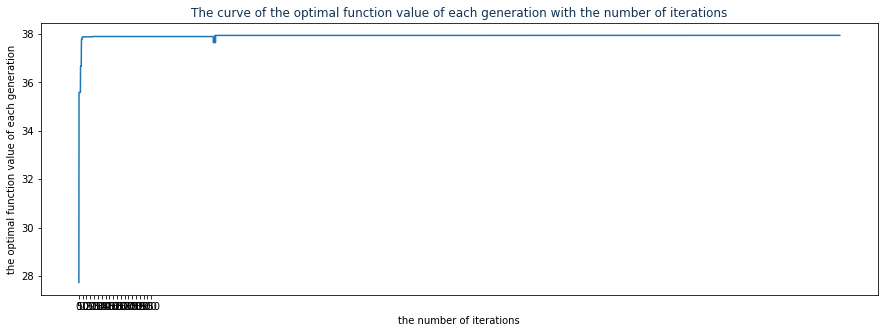

In [32]:
#输出结果-----------------------------------------------------------------------
best_value=max(t)
hh=t.index(max(t))
print(best_value)
print(decode(best_ind[hh],chromo_len,upper,lower))
#画出收敛曲线
plt.figure(figsize=(15,5))            #调整图像大小
plt.xticks(range(0,1000,50))#调整坐标
plt.plot(t)
plt.title('The curve of the optimal function value of each generation with the number of iterations',color='#123456')
plt.xlabel('the number of iterations')
plt.ylabel('the optimal function value of each generation')
plt.savefig('1.jpg')

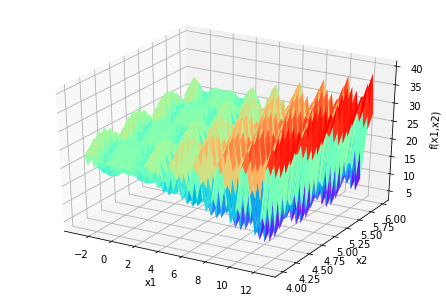

In [33]:
#画出函数与解的分布 
fig = plt.figure()
ax = Axes3D(fig)
x1 = np.arange(-3,13,0.4)
x2 = np.arange(4,6,0.0460)
X, Y = np.meshgrid(x1,x2)#网格的创建，这个是关键
Z=21.5+X*np.sin(4*np.pi*X)+Y*np.sin(20*np.pi*Y)
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('f(x1,x2)') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
ax.scatter(np.array(realvalue)[:,0], np.array(realvalue)[:,1], np.array(last),marker='o', c='k')
plt.savefig('2.jpg')
plt.show()
